## Measuring PSFs for Multiplane Analysis

In this example we'll measure microscope PSFs for multiplane analysis (biplane in the example).

### Configuration

As with Spliner, to measure the PSF you'll need a movie of sparse fluorescent beads being scanned through the microscope focus. We typically do this with small fluorescent beads on the order of 0.1um in diameter. The beads are fixed to the coverslip using a buffer with 100mM MgCl2. The coverslip is scanned through the focus in 10nm steps using a piezo z scanner. We assume that the drift in XYZ is neglible during the time it takes to take these movies (10s of seconds).

In this example we're just going to simulate this using a distortion free theoritical PSF. 

In [1]:
import os
root=r"F:\moritz\babcock_test\biplane_500nm"
script_root = r'E:\GitHub\storm-analysis\storm_analysis'
os.chdir(root)
print(os.getcwd())

F:\moritz\babcock_test\biplane_500nm


Generate the sample data for this example. 

Typically you will need sCMOS calibration files for your cameras as well a file containing the (first order) transform betweens the cameras.  
The `scmos_cal` notebook discusses how to calibrate a camera.  
The `micrometry_mapping` notebook discusses one approach to measuring the transform between different cameras.  

In [2]:
#import storm_analysis.jupyter_examples.multiplane_measure_psf as multiplane_measure_psf
os.chdir(script_root)
import jupyter_examples.multiplane_measure_psf_extbiplane as multiplane_measure_psf
os.chdir(root)

# Make a fake CMOS calibration file.
multiplane_measure_psf.makeCMOSCalibration()

# Make a fake mapping file.
multiplane_measure_psf.makeMapping()

# Make a bead movie for each camera.
multiplane_measure_psf.makeSampleData()

Creating data for PSF measurement.
Added 18
Added 18
Added 18
Frame 0 18 emitters
Frame 1 18 emitters
Frame 2 18 emitters
Frame 3 18 emitters
Frame 4 18 emitters
Frame 5 18 emitters
Frame 6 18 emitters
Frame 7 18 emitters
Frame 8 18 emitters
Frame 9 18 emitters
Frame 10 18 emitters
Frame 11 18 emitters
Frame 12 18 emitters
Frame 13 18 emitters
Frame 14 18 emitters
Frame 15 18 emitters
Frame 16 18 emitters
Frame 17 18 emitters
Frame 18 18 emitters
Frame 19 18 emitters
Frame 20 18 emitters
Frame 21 18 emitters
Frame 22 18 emitters
Frame 23 18 emitters
Frame 24 18 emitters
Frame 25 18 emitters
Frame 26 18 emitters
Frame 27 18 emitters
Frame 28 18 emitters
Frame 29 18 emitters
Frame 30 18 emitters
Frame 31 18 emitters
Frame 32 18 emitters
Frame 33 18 emitters
Frame 34 18 emitters
Frame 35 18 emitters
Frame 36 18 emitters
Frame 37 18 emitters
Frame 38 18 emitters
Frame 39 18 emitters
Frame 40 18 emitters
Frame 41 18 emitters
Frame 42 18 emitters
Frame 43 18 emitters
Frame 44 18 emitters
Fra

### Identifying localizations to use in the PSF measurement.

The first step is to identify the localizations to use for PSF measurement. This is done by first analyzing an in focus image in channel 0 (the reference channel) with sCMOS (or 3D-DAOSTORM). Then the `psfLocalizations()` function is used to select localizations that are isolated from each other and also inside all of the images from all of the cameras.

In [3]:
# Identify localizations using sCMOS.

# This will create an analysis XML file that we can use for sCMOS analysis.
multiplane_measure_psf.sCMOSSingleFrameXML()

# Remove stale results, if any.
if os.path.exists("c1_zcal.hdf5"):
    os.remove("c1_zcal.hdf5")
    
# Run sCMOS analysis.
import storm_analysis.sCMOS.scmos_analysis as scmosAnalysis
scmosAnalysis.analyze("c1_zcal.dax", "c1_zcal.hdf5", "scmos_single_plane.xml")

# Select good localizations in one of the analyzed frames (frame 100 in this example)
# We specify a minimum localization separation of 28 pixels (2 x aoi_size).
import storm_analysis.multi_plane.psf_localizations as psfLocalizations
#psfLocalizations.psfLocalizations("c1_zcal.hdf5", "map.map", frame = 100, aoi_size = 14)
psfLocalizations.psfLocalizations("c1_zcal.hdf5", "map.map", frame =150, aoi_size = 14)


version 2023.02.26

Peak finding
 Removing values < 1.0 in frame 0
Frame: 0 0 0
 Removing values < 1.0 in frame 1
Frame: 1 0 0
 Removing values < 1.0 in frame 2
Frame: 2 0 0
 Removing values < 1.0 in frame 3
Frame: 3 0 0
 Removing values < 1.0 in frame 4
Frame: 4 0 0
 Removing values < 1.0 in frame 5
Frame: 5 0 0
 Removing values < 1.0 in frame 6
Frame: 6 0 0
 Removing values < 1.0 in frame 7
Frame: 7 0 0
 Removing values < 1.0 in frame 8
Frame: 8 0 0
 Removing values < 1.0 in frame 9
Frame: 9 0 0
 Removing values < 1.0 in frame 10
Frame: 10 0 0
 Removing values < 1.0 in frame 11
Frame: 11 0 0
 Removing values < 1.0 in frame 12
Frame: 12 0 0
 Removing values < 1.0 in frame 13
Frame: 13 0 0
 Removing values < 1.0 in frame 14
Frame: 14 0 0
 Removing values < 1.0 in frame 15
Frame: 15 0 0
 Removing values < 1.0 in frame 16
Frame: 16 0 0
 Removing values < 1.0 in frame 17
Frame: 17 0 0
 Removing values < 1.0 in frame 18
Frame: 18 0 0
 Removing values < 1.0 in frame 19
Frame: 19 0 0
 Remov

Channel 1 (frame 150)


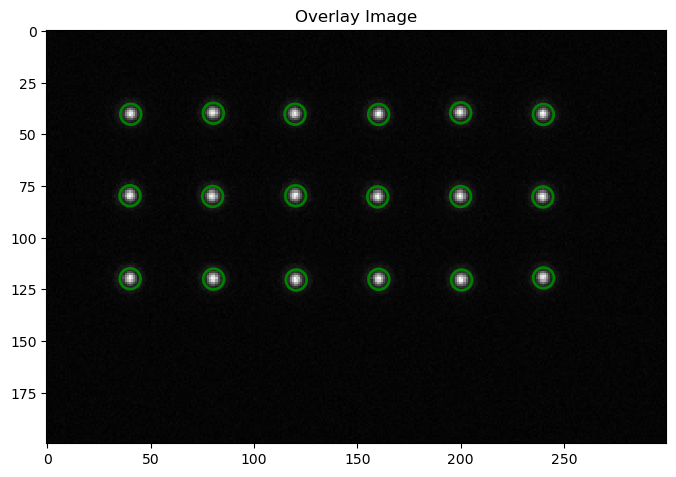

Channel 2 (frame 50)


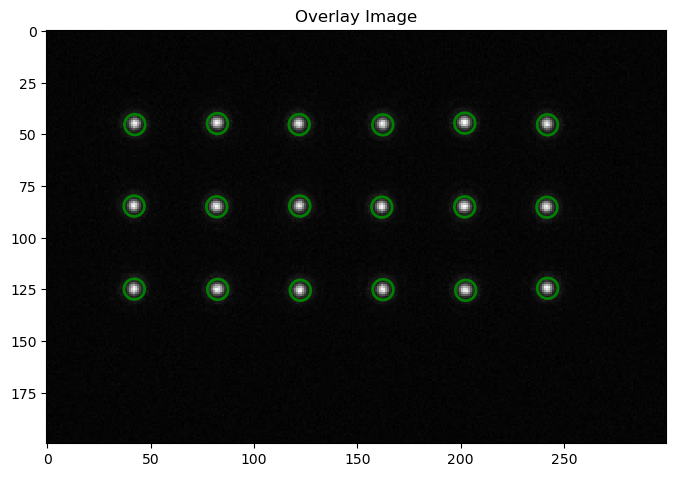

In [4]:
# Visual check of the selected localizations.
print("Channel 1 (frame 150)")
multiplane_measure_psf.overlayImage("c1_zcal.dax", "c1_zcal_c1_psf.hdf5",150)

print("Channel 2 (frame 50)")
multiplane_measure_psf.overlayImage("c2_zcal.dax", "c1_zcal_c2_psf.hdf5", 50)

### Measure Z stacks for each channel.

In [5]:
import storm_analysis.multi_plane.psf_zstack as psfZStack

psfZStack.psfZStack("c1_zcal.dax", "c1_zcal_c1_psf.hdf5", "c1_zstack", scmos_cal = "calib.npy", aoi_size = 12)
psfZStack.psfZStack("c2_zcal.dax", "c1_zcal_c2_psf.hdf5", "c2_zstack", scmos_cal = "calib.npy", aoi_size = 12)


Processing frame 0
 Removing values < 1.0 in frame 0
 Removing values < 1.0 in frame 1
 Removing values < 1.0 in frame 2
 Removing values < 1.0 in frame 3
 Removing values < 1.0 in frame 4
 Removing values < 1.0 in frame 5
 Removing values < 1.0 in frame 6
 Removing values < 1.0 in frame 7
 Removing values < 1.0 in frame 8
 Removing values < 1.0 in frame 9
 Removing values < 1.0 in frame 10
 Removing values < 1.0 in frame 11
 Removing values < 1.0 in frame 12
 Removing values < 1.0 in frame 13
 Removing values < 1.0 in frame 14
 Removing values < 1.0 in frame 15
 Removing values < 1.0 in frame 16
 Removing values < 1.0 in frame 17
 Removing values < 1.0 in frame 18
 Removing values < 1.0 in frame 19
 Removing values < 1.0 in frame 20
 Removing values < 1.0 in frame 21
 Removing values < 1.0 in frame 22
 Removing values < 1.0 in frame 23
 Removing values < 1.0 in frame 24
 Removing values < 1.0 in frame 25
 Removing values < 1.0 in frame 26
 Removing values < 1.0 in frame 27
 Removing v

Note: If you have linear drift in X/Y during PSF measurement you can correct for it at this stage using the `driftx` and `drifty` arguments to `psfZStack()`. One way to estimate the correct values to use is to analyze the entire calibration movie, then use `multi_plane.zstack_xydrift.xyDrift()`.

### Measure the PSFs for each channel.

If you are doing multicolor analysis at the same time then you'll want to use `normalize = True`. In multicolor analysis each camera would also be detecting different light wavelengths.

As with `Spliner` PSF measurement, you will need a text file containing the z-offset of each frame in the movie. This file contains two columns, the first is whether or not the data in this frame should be used (0 = No, 1 = Yes) and the second contains the z offset in microns. In this example this was automatically generated by the `makeSampleData()` function.

In [6]:
# Load sample z_offsets.txt file. In this example every frame is valid.
import numpy
z_offsets = numpy.loadtxt("z_offset.txt")

print(z_offsets[:,:])

[[ 1.0000000e+00 -1.0000000e+00]
 [ 1.0000000e+00 -9.9000000e-01]
 [ 1.0000000e+00 -9.8000000e-01]
 [ 1.0000000e+00 -9.7000000e-01]
 [ 1.0000000e+00 -9.6000000e-01]
 [ 1.0000000e+00 -9.5000000e-01]
 [ 1.0000000e+00 -9.4000000e-01]
 [ 1.0000000e+00 -9.3000000e-01]
 [ 1.0000000e+00 -9.2000000e-01]
 [ 1.0000000e+00 -9.1000000e-01]
 [ 1.0000000e+00 -9.0000000e-01]
 [ 1.0000000e+00 -8.9000000e-01]
 [ 1.0000000e+00 -8.8000000e-01]
 [ 1.0000000e+00 -8.7000000e-01]
 [ 1.0000000e+00 -8.6000000e-01]
 [ 1.0000000e+00 -8.5000000e-01]
 [ 1.0000000e+00 -8.4000000e-01]
 [ 1.0000000e+00 -8.3000000e-01]
 [ 1.0000000e+00 -8.2000000e-01]
 [ 1.0000000e+00 -8.1000000e-01]
 [ 1.0000000e+00 -8.0000000e-01]
 [ 1.0000000e+00 -7.9000000e-01]
 [ 1.0000000e+00 -7.8000000e-01]
 [ 1.0000000e+00 -7.7000000e-01]
 [ 1.0000000e+00 -7.6000000e-01]
 [ 1.0000000e+00 -7.5000000e-01]
 [ 1.0000000e+00 -7.4000000e-01]
 [ 1.0000000e+00 -7.3000000e-01]
 [ 1.0000000e+00 -7.2000000e-01]
 [ 1.0000000e+00 -7.1000000e-01]
 [ 1.00000

In [7]:
# PSF measurement
import storm_analysis.multi_plane.measure_psf as measurePSF

print("{0:.3f} pixel size (nm)".format(multiplane_measure_psf.pixel_size))
print("{0:.3f} spline z range (um)".format(multiplane_measure_psf.spline_z_range))
print()

measurePSF.measurePSF("c1_zstack.npy", 
                      "z_offset.txt", 
                      "c1_psf.psf", 
                      pixel_size = multiplane_measure_psf.pixel_size * 1.0e-3, # Pixel size is in microns.
                      refine = False, 
                      z_range = multiplane_measure_psf.spline_z_range, # Spline z range in microns. 
                      z_step = 0.050, 
                      normalize = False)

print()
measurePSF.measurePSF("c2_zstack.npy", 
                      "z_offset.txt", 
                      "c2_psf.psf", 
                      pixel_size = multiplane_measure_psf.pixel_size * 1.0e-3, # Pixel size is in microns.
                      refine = False, 
                      z_range = multiplane_measure_psf.spline_z_range, # Spline z range in microns. 
                      z_step = 0.050, 
                      normalize = False)

100.000 pixel size (nm)
1.000 spline z range (um)

z plane 0 has 3 samples
z plane 1 has 5 samples
z plane 2 has 5 samples
z plane 3 has 5 samples
z plane 4 has 5 samples
z plane 5 has 5 samples
z plane 6 has 5 samples
z plane 7 has 5 samples
z plane 8 has 5 samples
z plane 9 has 5 samples
z plane 10 has 5 samples
z plane 11 has 5 samples
z plane 12 has 5 samples
z plane 13 has 5 samples
z plane 14 has 5 samples
z plane 15 has 5 samples
z plane 16 has 5 samples
z plane 17 has 5 samples
z plane 18 has 5 samples
z plane 19 has 5 samples
z plane 20 has 5 samples
z plane 21 has 5 samples
z plane 22 has 5 samples
z plane 23 has 5 samples
z plane 24 has 5 samples
z plane 25 has 5 samples
z plane 26 has 5 samples
z plane 27 has 5 samples
z plane 28 has 5 samples
z plane 29 has 5 samples
z plane 30 has 5 samples
z plane 31 has 5 samples
z plane 32 has 5 samples
z plane 33 has 5 samples
z plane 34 has 5 samples
z plane 35 has 5 samples
z plane 36 has 5 samples
z plane 37 has 5 samples
z plane 3

In [8]:
multiplane_measure_psf.spline_z_range

1.0

### Visualize the measured PSFs

PSF shape: (41, 24, 24)
pixel size: 0.100um
zmin, zmax: -1000.0nm, 1000.0nm


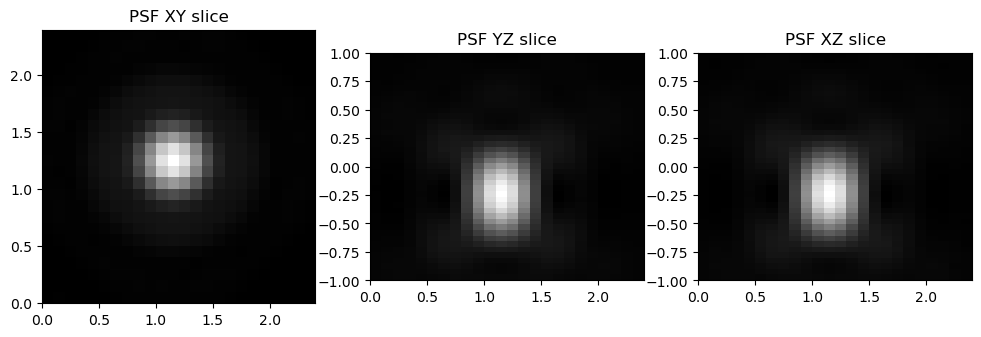

Plots are in microns
PSF shape: (41, 24, 24)
pixel size: 0.100um
zmin, zmax: -1000.0nm, 1000.0nm


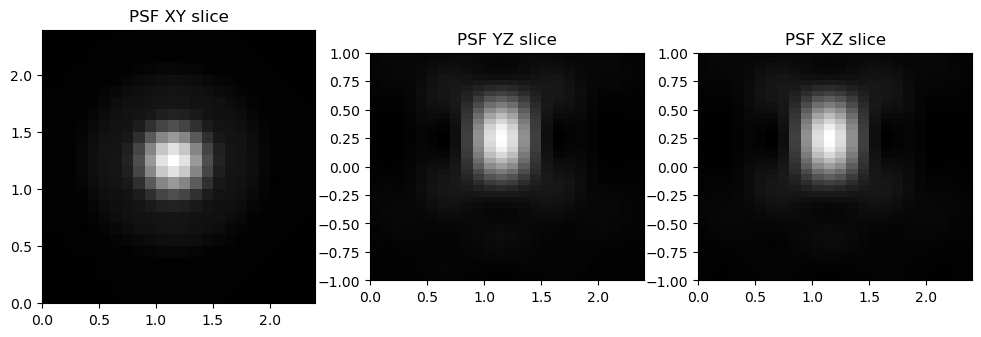

Plots are in microns


In [9]:
import storm_analysis.jupyter_examples.psf_images as psfImages

psfImages.psfImages("c1_psf.psf")
psfImages.psfImages("c2_psf.psf")


The next step is to convert the measured PSFs to splines. This is discussed in the `multiplane_psfs_to_splines` notebook.

You can also examine the PSFs with a tool like ImageJ. Tiff versions of the PSFs are also created, "c1_psf.tif" and "c2_psf.tif" in this example.